Programming for Data Analysis Project 2019

The problem statement is to synthesise simulate a data set.  I looked up some definitions of syntheise to make sure I understood the requirements of the project.  It is a method that uses statistical techniques to combine results from different studies and obtain a quantitative estimate of the overall effect of a particular intervention or variable on a defined outcome—i.e., it is a statistical process for pooling data from many clinical trials to glean a clear answer. https://medical-dictionary.thefreedictionary.com/data+synthesis.  But there can be some cons.  Bias, potential for analytical sloppiness, lack of understanding of basic issues, failure to consider major covariates, and overstating the strengths and precision of the results from Segen's Medical Dictionary.

When we were given the problem statement I decided to look into the National Car Testing statics.  My own one had recently had to under go one and while it failed the first time it passed the retest.  I started to wonder that if there was any correlation between the car year of manufacture, model and pass rate.  As the 2019 year data is incomplete I chose 2018 instead.  My car had also done the nct in 2018 and once again it had failed the original test but passed the retest.

Compulsory car testing was introduced in Ireland in 2000 as part of an EU Directive that makes car testing compulsory in all member states. It is an offence to drive a car without displaying a National Car Testing Service disc, if the car is liable for testing. Offenders will face Class C fines, as well as penalty points.

The test is called the National Car Test and is carried out on behalf of the Government by the National Car Testing Service Ltd (NCTS). The test is aimed at improving road safety and enhancing environmental protection. 

If a vehicle is over 4 years old it has to take a test.  From the vehicle being 4 years to under 10 years old it has to be tested every 2 years.  Once the vehicle gets to 10 years but less than 30, it then has to be tested every year.  Between 30 and 39 years old the vehicle must be tested every 2 years again and it can not be used for commercial purposes.  That would apply mostly to vintage cars that would be mostly for show only.  There are exemptions to the nct also.  Vehicles registered prior to 1st January 1980 so not need to be tested, cars permanently based on islands that are not connected to the mainland do not require testing and motor vehicles belonging to the Armed Forces, the Garda Síochána or the Fire Service are not subject to mandatory testing.

https://www.citizensinformation.ie/en/travel_and_recreation/vehicle_standards/national_car_test.html

The National Car Test is separate to the CVRT (Commercial Vehicle Roadworthiness Test), which was formerly known as DoE (Department of Environment) Test.  The Commercial Vehicle Roadworthiness Test (CVRT) is a roadworthiness test for all commercial vehicles, buses with more than eight passenger seats and ambulances, all over one year old.  There are two types of commercial vehicle tests, one for Light Commercial Vehicles (LCVs) and one for Heavy Commercial Vehicles (HCVs).
 
The LCV test is for:
all small goods vehicles with a gross vehicle weight (GVW) of 3,500 kg or less

The HCV test covers all other commercial vehicles including:
goods vehicles over 3,500 kg GVW
goods trailers over 3,500 kg GVW
buses with more than eight passenger seats
ambulances

https://www.cvrt.ie/en/About-CVRT/Pages/What%20is%20the%20CVRT.aspx






Initially, I began by looking at the the nct.ie to see what information was available.  There was a section on statistics which had the pass, fail refusal and fail dangerous rated for 2018.  https://www.ncts.ie/1127
This was interesting but I wanted to see if a particular make/model out performed the rest of them or were they all broadly similar.  I then looked into the central statistics office statbank which not only provided the figures of pass/fail rates, it also broke them down by each centre. https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=ROA10&PLanguage=0  

This was very interesting but still not what I was looking for.  I then went to the RSA website which had the information I was looking for. https://www.rsa.ie/RSA/Your-Vehicle/Your-Vehicle-/NCT-Statistics-/

https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp Female and male full and provisional licences

Before I even begin to look at the data there are some assumptions I have.  It will be interesting to see how it will turn out.  First, I expect that the newer cars will have a much higher pass rate than older ones.  I expect about half to fail the first time but the majority then pass the second time.  I expect of the ones which fail initially about 10% will be listed as fail dangerous.  This is based soley on my own observations from takling to my family and friends over the last few years.

Pass Rates

From the information provided by the RSA for 2018 over all there was approximately a 49% pass rate, 50% fail and 1% incomplete. Within all years of Hyundai Santa Fe's it changed to an approximate 36% pass, 63% fail and 1% incomplete rate. This information is available from https://www.rsa.ie/RSA/Your-Vehicle/Your-Vehicle-/NCT-Statistics-/


Fuel Type

There are two types of fuel which concern this dataset. Diesel and petrol.  I will have to add this variable as it is not included.  I again used statbank and got the breakdown for them. The information doesn not exist prior to 2010 and I only go up to 2015 for the nct so that is all I will import.  I plan to get a rough idea on the breakdown and apply it to my database.  I sourced this information from https://statbank.cso.ie/px/pxeirestat/statire/SelectVarVal/saveselections.asp


Sex

I obtained the 2018 information from https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp From the above it can be seen that 53% of males and 47% of females held full driving licences. The provisional licences were more evenly split with approximately 50% of each sexes. Overall, 92% of licences held in 2018 were Full and 8% were Provisional.

Mileage

Another variable I will add to my data is mileage and it will be split between petrol and diesel. I sourced the information from https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp and tidyied it up to suit my requirements as I think total mileage will have an effect on the pass/fail rate. The average km per year over a 14 year period (The information only goes to 2015 at the moment) for a petrol car is 13,489 and diesel is 19,598.

Import the data, libraries and rearrange.

In [162]:
# Import all required libraries


#Import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [163]:
pwd

'C:\\Users\\Rebecca\\Desktop\\Prog Data 2019\\Programming-for-Data-Analysis-Project-2019'

In [164]:
import os
import csv

In [165]:
#import csv -  I used this method as when I loaded it originally it was throwing up an error. I eventually realised it was a few lines of text which was at the start of the file.  I deleted it and the error message went.
# https://github.com/llSourcell/tensorflow_chatbot/issues/17
#df = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/nct18.csv", delimiter = ',' , encoding = 'unicode_escape')
#print (df)

In [166]:
import csv
df = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/nct18.csv")

print (df)

            Make   Model    Year  Total   Pass  Pass %   Fail  Fail %  area1  \
0         ABARTH  595.00  2013.0    1.0    1.0   100.0    0.0     0.0    0.0   
1             AC   OTHER  2006.0    1.0    0.0     0.0    1.0   100.0    1.0   
2     ALFA ROMEO  145.00  1998.0    2.0    1.0    50.0    1.0    50.0    0.0   
3     ALFA ROMEO  145.00  1999.0    2.0    1.0    50.0    1.0    50.0    1.0   
4     ALFA ROMEO  145.00  2000.0    2.0    0.0     0.0    2.0   100.0    1.0   
5     ALFA ROMEO  146.00  1997.0    2.0    0.0     0.0    2.0   100.0    1.0   
6     ALFA ROMEO  146.00  1998.0    3.0    0.0     0.0    3.0   100.0    2.0   
7     ALFA ROMEO  146.00  1999.0    1.0    0.0     0.0    1.0   100.0    1.0   
8     ALFA ROMEO  146.00  2000.0    4.0    1.0    25.0    3.0    75.0    0.0   
9     ALFA ROMEO  147.00  2001.0   10.0    4.0    40.0    6.0    60.0    3.0   
10    ALFA ROMEO  147.00  2002.0   33.0   10.0    30.3   23.0    69.7    5.0   
11    ALFA ROMEO  147.00  2003.0   35.0 

In [167]:
df.head()

,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,area1,area2,...,area19,area20,area21,area22,area23,area24,area25,area26,Incomplete,Incomplete %
0,ABARTH,595.00,2013.0,1.0,1.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AC,OTHER,2006.0,1.0,0.0,0.0,1.0,100.0,1.0,100.0,...,1.0,100.0,1.0,100.0,1.0,100.0,0.0,0.0,0.0,0.0
2,ALFA ROMEO,145.00,1998.0,2.0,1.0,50.0,1.0,50.0,0.0,0.0,...,0.0,0.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ALFA ROMEO,145.00,1999.0,2.0,1.0,50.0,1.0,50.0,1.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALFA ROMEO,145.00,2000.0,2.0,0.0,0.0,2.0,100.0,1.0,50.0,...,1.0,50.0,1.0,50.0,1.0,50.0,0.0,0.0,0.0,0.0


In [168]:
df.tail()

,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,area1,area2,...,area19,area20,area21,area22,area23,area24,area25,area26,Incomplete,Incomplete %
8722,VOLVO,XC90,2013.0,2.0,0.0,0.0,2.0,100.0,0.0,0.0,...,0.0,0.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
8723,VOLVO,XC90,2014.0,69.0,44.0,63.8,25.0,36.2,4.0,5.8,...,5.0,7.2,7.0,10.1,0.0,0.0,0.0,0.0,0.0,0.0
8724,VOLVO,XC90,2015.0,3.0,2.0,66.7,1.0,33.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8725,VOLVO,XC90,2016.0,1.0,1.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8726,WESTFIELD,OTHER,2006.0,3.0,1.0,33.3,2.0,66.7,1.0,33.3,...,1.0,33.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
# Far more columns than I want, delete the ones I do not need https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
df.drop(["area1", "area2", "area3","area4", "area5", "area6","area7", "area8", "area9","area10", "area11", "area12","area13", "area14", "area15","area16", "area17", "area18","area19", "area20", "area21","area22", "area23", "area24","area25", "area26"], axis=1, inplace=True)
df


,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,Incomplete,Incomplete %
0,ABARTH,595.00,2013.0,1.0,1.0,100.0,0.0,0.0,0.0,0.0
1,AC,OTHER,2006.0,1.0,0.0,0.0,1.0,100.0,0.0,0.0
2,ALFA ROMEO,145.00,1998.0,2.0,1.0,50.0,1.0,50.0,0.0,0.0
3,ALFA ROMEO,145.00,1999.0,2.0,1.0,50.0,1.0,50.0,0.0,0.0
4,ALFA ROMEO,145.00,2000.0,2.0,0.0,0.0,2.0,100.0,0.0,0.0
5,ALFA ROMEO,146.00,1997.0,2.0,0.0,0.0,2.0,100.0,0.0,0.0
6,ALFA ROMEO,146.00,1998.0,3.0,0.0,0.0,3.0,100.0,0.0,0.0
7,ALFA ROMEO,146.00,1999.0,1.0,0.0,0.0,1.0,100.0,0.0,0.0
8,ALFA ROMEO,146.00,2000.0,4.0,1.0,25.0,3.0,75.0,0.0,0.0
9,ALFA ROMEO,147.00,2001.0,10.0,4.0,40.0,6.0,60.0,0.0,0.0


In [170]:
# Another way to import the original file
#import csv
#df = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/nct.csv")

#print (df)

In [171]:
df.head()

,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,Incomplete,Incomplete %
0,ABARTH,595.00,2013.0,1.0,1.0,100.0,0.0,0.0,0.0,0.0
1,AC,OTHER,2006.0,1.0,0.0,0.0,1.0,100.0,0.0,0.0
2,ALFA ROMEO,145.00,1998.0,2.0,1.0,50.0,1.0,50.0,0.0,0.0
3,ALFA ROMEO,145.00,1999.0,2.0,1.0,50.0,1.0,50.0,0.0,0.0
4,ALFA ROMEO,145.00,2000.0,2.0,0.0,0.0,2.0,100.0,0.0,0.0


In [172]:
df.tail()

,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,Incomplete,Incomplete %
8722,VOLVO,XC90,2013.0,2.0,0.0,0.0,2.0,100.0,0.0,0.0
8723,VOLVO,XC90,2014.0,69.0,44.0,63.8,25.0,36.2,0.0,0.0
8724,VOLVO,XC90,2015.0,3.0,2.0,66.7,1.0,33.3,0.0,0.0
8725,VOLVO,XC90,2016.0,1.0,1.0,100.0,0.0,0.0,0.0,0.0
8726,WESTFIELD,OTHER,2006.0,3.0,1.0,33.3,2.0,66.7,0.0,0.0


In [173]:
df.describe()

,Year,Total,Pass,Pass %,Fail,Fail %,Incomplete,Incomplete %
count,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000,8727.000000
mean,2003.846224,153.977312,75.827088,47.664913,78.150223,52.335797,0.114702,0.254933
std,8.741819,580.532176,291.846370,32.205022,314.299107,32.205037,0.685312,3.385364
min,1932.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,2.000000,1.000000,25.600000,1.000000,28.600000,0.000000,0.000000
50%,2005.000000,8.000000,4.000000,45.700000,4.000000,54.300000,0.000000,0.000000
75%,2010.000000,57.500000,27.500000,71.400000,28.000000,74.400000,0.000000,0.000000
max,2018.000000,10556.000000,5474.000000,100.000000,5970.000000,100.000000,20.000000,100.000000


In [174]:
# See if there is any information missing, it all appears to be there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8727 entries, 0 to 8726
Data columns (total 10 columns):
Make            8727 non-null object
Model           8727 non-null object
Year            8727 non-null float64
Total           8727 non-null float64
Pass            8727 non-null float64
Pass %          8727 non-null float64
Fail            8727 non-null float64
Fail %          8727 non-null float64
Incomplete      8727 non-null float64
Incomplete %    8727 non-null float64
dtypes: float64(8), object(2)
memory usage: 681.9+ KB


In [175]:
# Another way to check and see if all the information is there.  It confirms that there is nothing missing.
df.isnull().sum()

Make            0
Model           0
Year            0
Total           0
Pass            0
Pass %          0
Fail            0
Fail %          0
Incomplete      0
Incomplete %    0
dtype: int64

In [176]:
# Begin to look at the data and see the make of the car and the number of them that failed the nct.
df.groupby(by='Make')['Fail'].sum()

Make
ABARTH                        0.0
AC                            1.0
ALFA ROMEO                 1436.0
ASQUITH                       2.0
ASTON MARTIN                 31.0
AUDI                      31171.0
AUSTIN                      181.0
AUSTIN ROVER                  0.0
BADSWORTH                     1.0
BEAUFORD                     14.0
BENTLEY                      63.0
BINZ                          0.0
BMW                       27495.0
BRAMWITH                      1.0
BRANFORD                      3.0
BRENCHLEY                     2.0
BRISTOL                       3.0
CADILLAC                      7.0
CARBODIES                     4.0
CATERHAM                      0.0
CHEVROLET                  2903.0
CHRYSLER                    831.0
CHRYSLER JEEP                 9.0
CITROEN                   13541.0
DACIA                       751.0
DAEWOO                      889.0
DAIHATSU                   1096.0
DAIMLER                      21.0
DATSUN                        1.0
DE LOREAN

In [177]:
# Select only the ones which I want to look into Hyundai Santa Fe.  I am calling it df2 to keep it separate from the original one.
df2=df[(df['Make'] == 'HYUNDAI') & (df['Model'] == 'SANTA FE')]
df2

,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,Incomplete,Incomplete %
3108,HYUNDAI,SANTA FE,2001.0,20.0,4.0,20.0,16.0,80.0,0.0,0.0
3109,HYUNDAI,SANTA FE,2002.0,139.0,29.0,20.9,110.0,79.1,0.0,0.0
3110,HYUNDAI,SANTA FE,2003.0,311.0,79.0,25.4,232.0,74.6,0.0,0.0
3111,HYUNDAI,SANTA FE,2004.0,614.0,169.0,27.5,445.0,72.5,1.0,0.2
3112,HYUNDAI,SANTA FE,2005.0,1048.0,341.0,32.5,707.0,67.5,1.0,0.1
3113,HYUNDAI,SANTA FE,2006.0,1310.0,398.0,30.4,912.0,69.6,0.0,0.0
3114,HYUNDAI,SANTA FE,2007.0,1552.0,481.0,31.0,1071.0,69.0,3.0,0.2
3115,HYUNDAI,SANTA FE,2008.0,642.0,216.0,33.6,426.0,66.4,0.0,0.0
3116,HYUNDAI,SANTA FE,2009.0,82.0,25.0,30.5,57.0,69.5,0.0,0.0
3117,HYUNDAI,SANTA FE,2010.0,221.0,99.0,44.8,122.0,55.2,0.0,0.0


In [178]:
# Another way to select the information, also acts as a double check to make sure I have the right information.
df[df['Model'].str.contains('SANTA FE')]

,Make,Model,Year,Total,Pass,Pass %,Fail,Fail %,Incomplete,Incomplete %
3108,HYUNDAI,SANTA FE,2001.0,20.0,4.0,20.0,16.0,80.0,0.0,0.0
3109,HYUNDAI,SANTA FE,2002.0,139.0,29.0,20.9,110.0,79.1,0.0,0.0
3110,HYUNDAI,SANTA FE,2003.0,311.0,79.0,25.4,232.0,74.6,0.0,0.0
3111,HYUNDAI,SANTA FE,2004.0,614.0,169.0,27.5,445.0,72.5,1.0,0.2
3112,HYUNDAI,SANTA FE,2005.0,1048.0,341.0,32.5,707.0,67.5,1.0,0.1
3113,HYUNDAI,SANTA FE,2006.0,1310.0,398.0,30.4,912.0,69.6,0.0,0.0
3114,HYUNDAI,SANTA FE,2007.0,1552.0,481.0,31.0,1071.0,69.0,3.0,0.2
3115,HYUNDAI,SANTA FE,2008.0,642.0,216.0,33.6,426.0,66.4,0.0,0.0
3116,HYUNDAI,SANTA FE,2009.0,82.0,25.0,30.5,57.0,69.5,0.0,0.0
3117,HYUNDAI,SANTA FE,2010.0,221.0,99.0,44.8,122.0,55.2,0.0,0.0


From the information provided by the RSA for 2018 over all there was approximately a  49% pass rate, 50% fail and 1% incomplete.  Within all years of Hyundai Santa Fe's it changed to an approximate 36% pass, 63% fail and 1% incomplete rate.

In [179]:
# These are the workings on the number cars per year that went through the NCT in 2008 and expressed as a percentage of the total.

df7 = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/Hyundai.csv")
print (df7)

   Vehicle Make Vehicle Model  Year Of Birth   Total      %  Unnamed: 5  \
0       HYUNDAI      SANTA FE         2001.0    20.0    0.3         NaN   
1       HYUNDAI      SANTA FE         2002.0   139.0    2.0         NaN   
2       HYUNDAI      SANTA FE         2003.0   311.0    4.4         NaN   
3       HYUNDAI      SANTA FE         2004.0   614.0    8.7         NaN   
4       HYUNDAI      SANTA FE         2005.0  1048.0   14.9         NaN   
5       HYUNDAI      SANTA FE         2006.0  1310.0   18.7         NaN   
6       HYUNDAI      SANTA FE         2007.0  1552.0   22.1         NaN   
7       HYUNDAI      SANTA FE         2008.0   642.0    9.1         NaN   
8       HYUNDAI      SANTA FE         2009.0    82.0    1.2         NaN   
9       HYUNDAI      SANTA FE         2010.0   221.0    3.1         NaN   
10      HYUNDAI      SANTA FE         2011.0    64.0    0.9         NaN   
11      HYUNDAI      SANTA FE         2012.0   254.0    3.6         NaN   
12      HYUNDAI      SANT

In [180]:
# Workings on diesel/petrol split
# I want to add a variable to the table which states whether or not the car ran on petrol or diesel.  The figures are not available for that particular model so I again used statbank and got the breakdown for them. The information doesn not exist prior to 2010 and I only go up to 2015 for the nct so that is all I will import.  I plan to get a rough idea on the breakdown and apply it to my database.
import csv
df3 = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/dvp.csv")
print (df3)

     Year   2010.00   2011.00   2012.00   2013.00   2014.00   2015.00
0  Petrol   37934.0   31002.0   23888.0   25849.0   32098.0   41759.0
1  Diesel   81787.0   94918.0   88668.0   94176.0  111462.0  123951.0
2   Total  119721.0  125920.0  112556.0  120025.0  143560.0  165710.0


In [181]:
df3.head()

,Year,2010.00,2011.00,2012.00,2013.00,2014.00,2015.00
0,Petrol,37934.0,31002.0,23888.0,25849.0,32098.0,41759.0
1,Diesel,81787.0,94918.0,88668.0,94176.0,111462.0,123951.0
2,Total,119721.0,125920.0,112556.0,120025.0,143560.0,165710.0


In [182]:
# Calculate and show the percentage of petrol cars.  https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result

# Show the percentage of petrol cars in 2010
print (round( 37934/ 119721 * 100,2))

# Show the percentage of petrol cars in 2011
print (round( 31002/ 125920 * 100,2))

# Show the percentage of petrol cars in 2012
print (round( 23888/ 112556 * 100,2))

# Show the percentage of petrol cars in 2013
print (round( 25849/ 120025* 100,2))

# Show the percentage of petrol cars in 2014
print (round( 32098/ 143560 * 100,2))

# Show the percentage of petrol cars in 2015
print (round( 41759/ 165710 * 100,2))



from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

31.69
24.62
21.22
21.54
22.36
25.2


The average of the 6 years I have data for is that petrol cars accounted over all for 24%.  I will apply this to the data I will synthesise.

In [183]:
# Mileage workings

import csv
df4 = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/avgmile.csv")
print (df4)

                         Year    Petrol      %    Diesel    %.1    Total  \
0                     2001.00  12206.00  46.02  14320.00  53.98  26526.0   
1                     2002.00  12854.00  45.82  15198.00  54.18  28052.0   
2                     2003.00  12895.00  45.00  15759.00  55.00  28654.0   
3                     2004.00  12904.00  44.46  16122.00  55.54  29026.0   
4                     2005.00  13076.00  44.35  16406.00  55.65  29482.0   
5                     2006.00  12790.00  43.18  16830.00  56.82  29620.0   
6                     2007.00  13432.00  43.24  17629.00  56.76  31061.0   
7                     2008.00  13085.00  40.24  19430.00  59.76  32515.0   
8                     2009.00  12887.00  39.70  19570.00  60.30  32457.0   
9                     2010.00  10822.00  36.64  18712.00  63.36  29534.0   
10                    2011.00  10794.00  35.75  19398.00  64.25  30192.0   
11                    2012.00  11938.00  37.29  20075.00  62.71  32013.0   
12          

Another variable I will add to my data is mileage and it will be split between petrol and diesel.  I sourced the information from https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp and tidyied it up to suit my requirements as total mileage will have an effect on the pass/fail rate.  The average km per year over a 14 year period (The information only goes to 2015 at the moment)  for a petrol car is 13,489 and diesel is 19,598.


In [184]:
# The final variables I will enter will be sex, and licence status.  

df6 = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/driver.csv")

print (df6)

  2018.00  Full Driving Licences        %  Learner Permit Driving Licences  \
0    Male               1422852.0   53.35                         119686.0   
1  Female               1244276.0   46.65                         120378.0   
2   Total               2667128.0  100.00                         240064.0   

      %.1  
0   49.86  
1   50.14  
2  100.00  


 I obtained the 2018 information from https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp From the above it can be seen that 53% of males and 47% of females held full driving licences.  The provisional licences were more evenly split with approximately 50% of each sexes. This means I will not have to change the split as they are equal. Overall, 92% of licences held in 2018 were Full and 8% were Provisional.

Now I have all my variables and their values I will recreate the dataframe based on that information.

In [185]:
df5 = pd.DataFrame(columns=["Year", "Fuel", "Status", "Sex"])



# Populate the data with the number of cars per year.
df5["Year"] = np.random.choice(["2001", "2002","2003","2004","2005","2006","2007","2008","2009",2010,2011,2012,2013,2014,2015], p=[0.004, 0.02, 0.044, 0.087, 0.149, 0.187, 0.221, 0.091, 0.012, 0.031, 0.009, 0.036, 0.013, 0.083, 0.013], size=(500))


# Create the fuel types
fuel = ["Petrol", "Diesel"]

# Populate the Fuel column with petrol and diesel, more diesel cars so do the weights accordingly.
df5["Fuel"] = np.random.choice(fuel, 500, p=[0.24, 0.76])



# Create the status types
status = ["Pass", "Fail", "Incomplete"]

# Populate the status column 
df5["Status"] = np.random.choice(status, 500, p=[0.36, 0.63, 0.01])

# Create the sexes
sex = ["Male", "Female"]

# Populate the column
df5["Sex"] = np.random.choice(sex, 500, p=[0.53, 0.47])

# Create the licence_type categories
Licence_Type = ["Full", "Learner"]

# Populate it
df5["Licence_type"] = np.random.choice(Licence_Type, 500, p=[0.92, 0.08])

print (df5)

     Year    Fuel      Status     Sex Licence_type
0    2006  Diesel        Fail    Male         Full
1    2014  Diesel        Fail  Female         Full
2    2005  Petrol        Pass  Female         Full
3    2015  Diesel        Fail    Male         Full
4    2005  Diesel        Fail    Male         Full
5    2014  Diesel        Fail    Male         Full
6    2006  Petrol        Fail    Male         Full
7    2002  Diesel        Fail    Male         Full
8    2004  Diesel        Pass    Male         Full
9    2005  Petrol        Fail    Male         Full
10   2007  Diesel        Fail    Male         Full
11   2004  Diesel        Fail  Female         Full
12   2006  Petrol  Incomplete    Male         Full
13   2014  Diesel        Fail    Male         Full
14   2012  Diesel        Fail    Male      Learner
15   2010  Petrol        Fail    Male         Full
16   2009  Diesel        Fail    Male         Full
17   2008  Diesel        Fail    Male         Full
18   2010  Diesel        Pass  

In [186]:
# Define a function to map the mileage values.  I have calculated that the average mile for one year is 16544 and applied it for the newest model.  I have then increased it each year going backwards.  This will ensure that a 2002 car could have a higher mileage than a 2015.
def set_value(row_number, assigned_value):
    return np.random.randint(1,assigned_value[row_number])

#Create the dictionary
year_dictionary ={'2001' : 248160, '2002' : 231616, '2003' : 215072, "2004" : 198528, "2005" : 181984, "2006": 165440, "2007" : 148896, "2008" : 132352, "2009" :115808,"2010" :99264, "2011" :82720, "2012" :66176, "2013" :49632, "2014" :33088, "2015" :16544}

df5["Mileage"] = df5["Year"].apply(set_value, args =(year_dictionary, )) 



df5


,Year,Fuel,Status,Sex,Licence_type,Mileage
0,2006,Diesel,Fail,Male,Full,41976
1,2014,Diesel,Fail,Female,Full,4689
2,2005,Petrol,Pass,Female,Full,99795
3,2015,Diesel,Fail,Male,Full,13349
4,2005,Diesel,Fail,Male,Full,29504
5,2014,Diesel,Fail,Male,Full,2222
6,2006,Petrol,Fail,Male,Full,85983
7,2002,Diesel,Fail,Male,Full,114720
8,2004,Diesel,Pass,Male,Full,3047
9,2005,Petrol,Fail,Male,Full,55223


In [187]:
# Populate the data with the number of cars per year.  Script taken from dataframe above
yr  = np.random.choice(["2001", "2002","2003","2004","2005","2006","2007","2008","2009",2010,2011,2012,2013,2014,2015], p=[0.004, 0.02, 0.044, 0.087, 0.149, 0.187, 0.221, 0.091, 0.012, 0.031, 0.009, 0.036, 0.013, 0.083, 0.013], size=(500))
yr

array(['2013', '2007', '2004', '2006', '2014', '2005', '2012', '2014',
       '2006', '2005', '2005', '2003', '2014', '2008', '2007', '2007',
       '2006', '2008', '2008', '2005', '2004', '2012', '2010', '2007',
       '2007', '2006', '2007', '2007', '2006', '2008', '2006', '2004',
       '2008', '2007', '2007', '2005', '2006', '2014', '2014', '2007',
       '2010', '2005', '2008', '2007', '2009', '2014', '2006', '2014',
       '2007', '2012', '2005', '2003', '2007', '2005', '2005', '2014',
       '2004', '2007', '2002', '2007', '2014', '2005', '2006', '2007',
       '2008', '2004', '2006', '2005', '2013', '2005', '2008', '2006',
       '2008', '2012', '2007', '2006', '2008', '2004', '2003', '2005',
       '2003', '2003', '2005', '2007', '2011', '2006', '2002', '2014',
       '2004', '2014', '2007', '2007', '2003', '2004', '2007', '2006',
       '2006', '2012', '2003', '2002', '2006', '2006', '2001', '2014',
       '2006', '2006', '2014', '2007', '2005', '2003', '2006', '2007',
      

In [188]:
df5["Mileage"].mean()



76275.424

In [189]:
df5.dtypes 

Year            object
Fuel            object
Status          object
Sex             object
Licence_type    object
Mileage          int64
dtype: object

In [190]:
# Change datatype of year from object to integer so I can plot it. https://www.ritchieng.com/pandas-changing-datatype/
df5["Year"] = df5.Year.astype(int)

In [191]:
df5.dtypes 

Year             int32
Fuel            object
Status          object
Sex             object
Licence_type    object
Mileage          int64
dtype: object

In [192]:
# Change datetype for mileage from int64 to int32 https://stackoverflow.com/questions/28910851/python-pandas-changing-some-column-types-to-categories
for col in ["Mileage"]:
    df5[col] = df5[col].astype("int32")
   
        

In [193]:
df5.dtypes 

Year             int32
Fuel            object
Status          object
Sex             object
Licence_type    object
Mileage          int32
dtype: object

In [194]:
df5["Year"].mean()

2007.006

<Figure size 720x360 with 0 Axes>

(array([ 95., 273.,  44.,  37.,  51.]),
 array([2002. , 2004.6, 2007.2, 2009.8, 2012.4, 2015. ]),
 <a list of 5 Patch objects>)

Text(0.5, 0, 'Year of Manufacture')

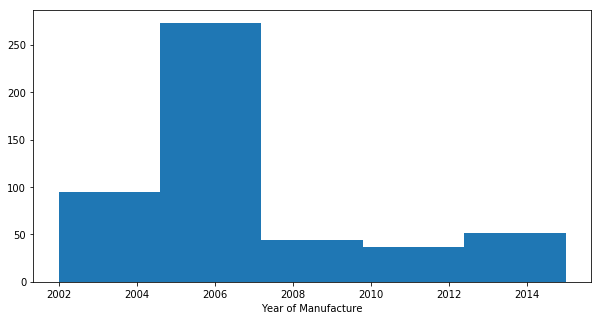

In [195]:
# Histogram showing the years of manufacture

plt.figure(figsize=(10,5))
plt.hist(df5.Year, bins=5)
plt.xlabel('Year of Manufacture')
plt.show()

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Probability density plot of the Year of Manufacture')

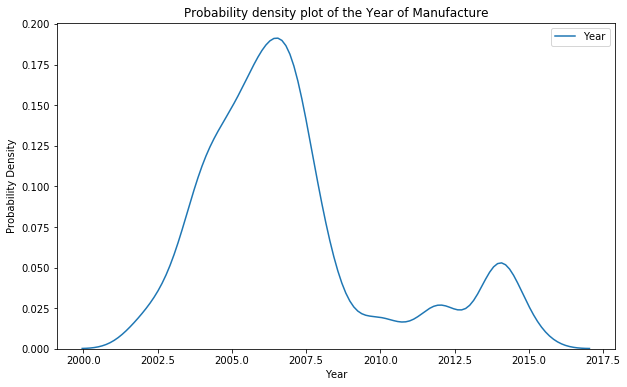

In [196]:

# A KDE plot is a lot like a histogram, it estimates the probability density of a continuous variable.
plt.figure(figsize=(10,6))
sns.kdeplot(df5['Year'], label='Year')
plt.xlabel('Year')
plt.ylabel('Probability Density')
plt.title('Probability density plot of the Year of Manufacture')
plt.show()

In [197]:
fu = np.random.choice(fuel, 500, p=[0.24, 0.76])
fu

array(['Petrol', 'Petrol', 'Diesel', 'Diesel', 'Diesel', 'Diesel',
       'Petrol', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel',
       'Diesel', 'Petrol', 'Diesel', 'Diesel', 'Diesel', 'Diesel',
       'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Diesel', 'Diesel',
       'Diesel', 'Petrol', 'Petrol', 'Petrol', 'Petrol', 'Diesel',
       'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Petrol',
       'Diesel', 'Diesel', 'Diesel', 'Petrol', 'Diesel', 'Diesel',
       'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Diesel',
       'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Petrol', 'Diesel',
       'Diesel', 'Diesel', 'Diesel', 'Petrol', 'Diesel', 'Diesel',
       'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Petrol', 'Diesel',
       'Petrol', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel',
       'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel',
       'Diesel', 'Petrol', 'Petrol', 'Diesel', 'Diesel', 'Diesel',
       'Petrol', 'Diesel', 'Diesel', 'Petrol', 'Diesel', 'Dies

In [198]:
df5.groupby(by="Fuel").size()

Fuel
Diesel    377
Petrol    123
dtype: int64

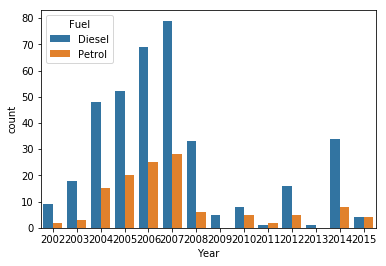

In [199]:
sns.countplot('Year', hue='Fuel', data=df5)

In [200]:
stat= np.random.choice(status, 500, p=[0.36, 0.63, 0.01])
stat

array(['Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass',
       'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Pass', 'Fail',
       'Fail', 'Pass', 'Incomplete', 'Pass', 'Pass', 'Fail', 'Fail',
       'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail',
       'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Pass',
       'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass',
       'Fail', 'Pass', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail',
       'Fail', 'Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail',
       'Pass', 'Fail', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass',
       'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail',
       'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
       'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass',
       'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass',
       'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail',
       '

<Figure size 720x360 with 0 Axes>

(array([317.,   0., 177.,   0.,   6.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <a list of 5 Patch objects>)

Text(0.5, 0, 'Status of Test')

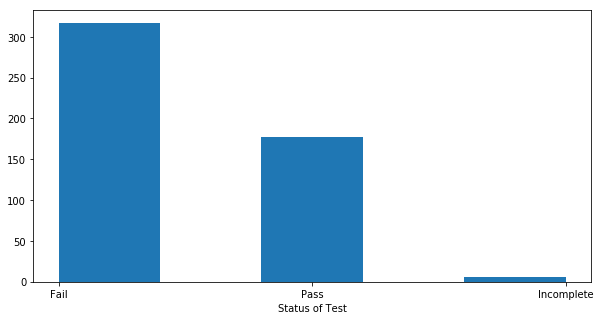

In [201]:
# Histogram showing the years of manufacture

plt.figure(figsize=(10,5))
plt.hist(stat, bins=5)
plt.xlabel('Status of Test')
plt.show()

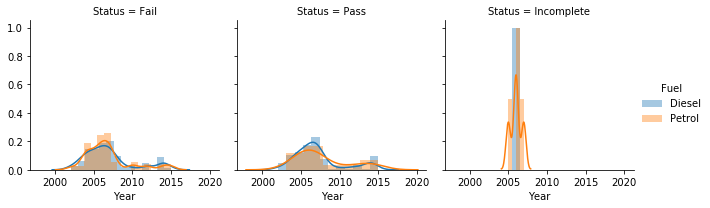

In [202]:

# KDE plots of the tip distribution separated by day and sex
g = sns.FacetGrid(df5, col="Status", hue="Fuel") 
g.map(sns.distplot, "Year")
g.add_legend() 
g.set(alpha=.5)

In [203]:
gen =np.random.choice(sex, 500, p=[0.53, 0.47])
gen

array(['Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Fe

<Figure size 720x360 with 0 Axes>

(array([260.,   0.,   0.,   0., 240.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

Text(0.5, 0, 'Status of Test')

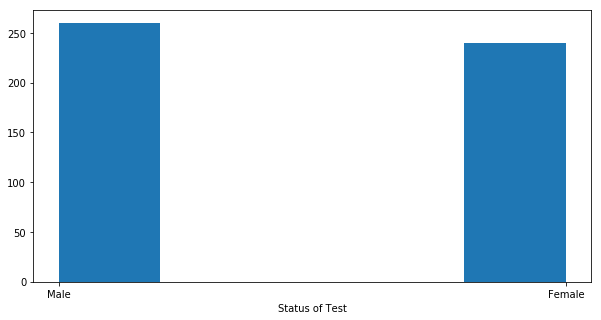

In [204]:
# Histogram showing the years of manufacture

plt.figure(figsize=(10,5))
plt.hist(gen, bins=5)
plt.xlabel('Status of Test')
plt.show()

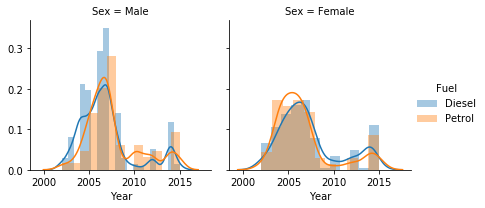

In [205]:

# KDE plots of the tip distribution separated by day and sex
g = sns.FacetGrid(df5, col="Sex", hue="Fuel") 
g.map(sns.distplot, "Year")
g.add_legend() 
g.set(alpha=.5)

In [206]:
lice= np.random.choice(Licence_Type, 500, p=[0.92, 0.08])
lice

array(['Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full',
       'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full',
       'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full',
       'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full',
       'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full',
       'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Learner', 'Full',
       'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full',
       'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full',
       'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full',
       'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full',
       'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Learner',
       'Full', 'Full', 'Full', 'Learner', 'Learner', 'Full', 'Full',
       'Full', 'Full', 'Full', 'Learner', 'Full', 'Full', 'Full', 'Full',
       'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Learne

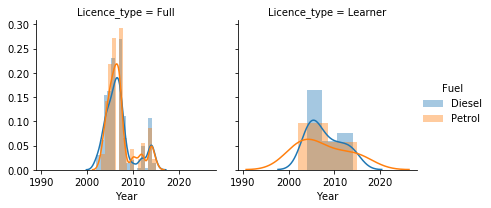

In [207]:

# KDE plots of the tip distribution separated by day and sex
g = sns.FacetGrid(df5, col="Licence_type", hue="Fuel") 
g.map(sns.distplot, "Year")
g.add_legend() 
g.set(alpha=.5)

In [208]:
df5.Mileage

0       41976
1        4689
2       99795
3       13349
4       29504
5        2222
6       85983
7      114720
8        3047
9       55223
10      50893
11      88373
12      92697
13      21499
14       5193
15      21080
16      76373
17      70556
18      54933
19      47877
20      94732
21      20187
22      21776
23     108161
24     119989
25     135815
26     105412
27      70613
28     113128
29       1315
        ...  
470     81827
471     59439
472     46774
473      4797
474     31091
475    181935
476     45055
477     30982
478     26971
479      5854
480    126972
481      3326
482    143842
483    136566
484      2888
485     24911
486     34907
487    121932
488     72937
489      3680
490     66905
491     74277
492    133447
493      6442
494    103625
495     84259
496     60977
497     85137
498     56983
499     87556
Name: Mileage, Length: 500, dtype: int32

Text(0, 0.5, 'Mileage')

Text(0.5, 1.0, 'Mileage')

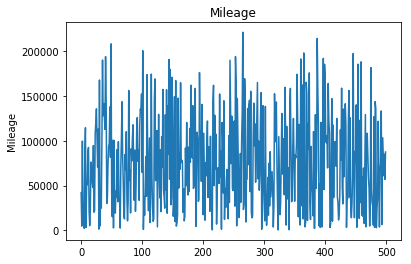

In [209]:
plt.plot(df5.Mileage) # Plot the spread of Mileage
plt.ylabel("Mileage") # name the y label
plt.title("Mileage") # give the plot a title

<Figure size 864x576 with 0 Axes>

(array([30., 13., 19., 19., 14.,  9., 22., 17., 18., 12., 19.,  8., 14.,
        14.,  8., 19., 12., 10., 12., 14., 12., 10., 14., 16., 11., 10.,
        11., 11., 10.,  8.,  8., 10., 10.,  4.,  5.,  9.,  4.,  7.,  4.,
         5.,  1.,  3.,  3.,  5.,  2.,  1.,  0.,  1.,  1.,  1.]),
 array([   436.  ,   4856.34,   9276.68,  13697.02,  18117.36,  22537.7 ,
         26958.04,  31378.38,  35798.72,  40219.06,  44639.4 ,  49059.74,
         53480.08,  57900.42,  62320.76,  66741.1 ,  71161.44,  75581.78,
         80002.12,  84422.46,  88842.8 ,  93263.14,  97683.48, 102103.82,
        106524.16, 110944.5 , 115364.84, 119785.18, 124205.52, 128625.86,
        133046.2 , 137466.54, 141886.88, 146307.22, 150727.56, 155147.9 ,
        159568.24, 163988.58, 168408.92, 172829.26, 177249.6 , 181669.94,
        186090.28, 190510.62, 194930.96, 199351.3 , 203771.64, 208191.98,
        212612.32, 217032.66, 221453.  ]),
 <a list of 50 Patch objects>)

Text(0.5, 0, 'Mileage')

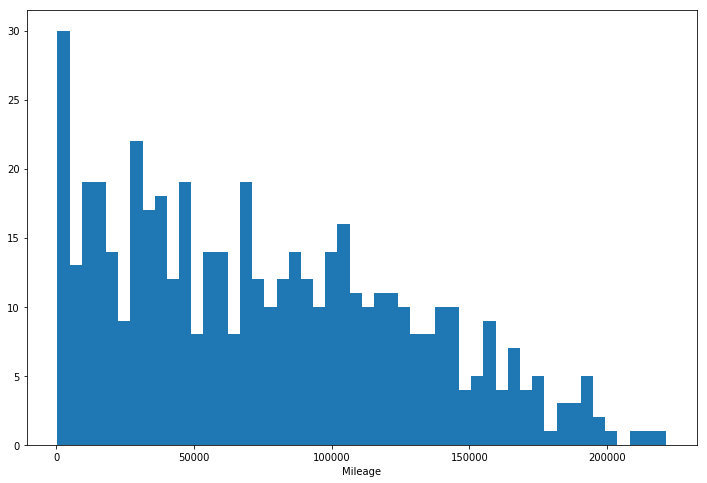

In [210]:
plt.figure(figsize=(12,8), facecolor='w', edgecolor='k', clear='True')
plt.hist(df5.Mileage,  bins=50)
plt.xlabel("Mileage")
plt.show()

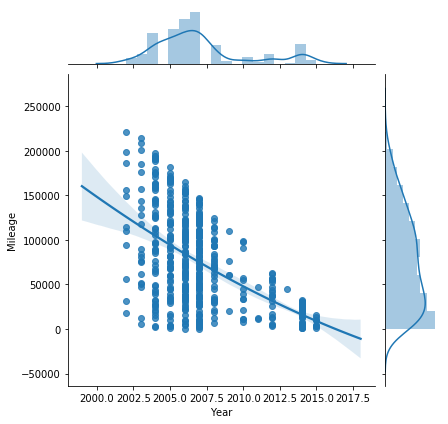

In [211]:
g = sns.JointGrid(x="Year", y="Mileage", data=df5) 
g.plot_joint(sns.regplot, order=2) 
g.plot_marginals(sns.distplot)

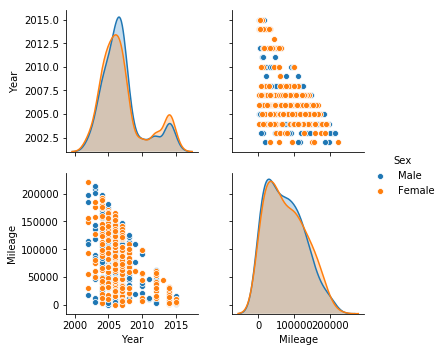

In [212]:
sns.pairplot(df5, "Sex")

In [213]:
data = pd.DataFrame({"Fuel" : fu, "Status" : stat, "Sex" : gen, "Licence_Type" : lice})
data

,Fuel,Status,Sex,Licence_Type
0,Petrol,Fail,Male,Full
1,Petrol,Fail,Male,Full
2,Diesel,Fail,Male,Full
3,Diesel,Fail,Female,Full
4,Diesel,Fail,Male,Full
5,Diesel,Fail,Male,Full
6,Petrol,Fail,Male,Full
7,Diesel,Pass,Female,Full
8,Diesel,Pass,Male,Full
9,Diesel,Pass,Female,Full


In [214]:
data.dtypes 

Fuel            object
Status          object
Sex             object
Licence_Type    object
dtype: object